In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel('/content/Final_Dataset.xlsx')

In [ ]:
data.head(3)

,Date,year-month,Exchange_rate(INR),percentage_change,Repo_rate,US_Fed_rate,CPI_India,CPI_US,Forex_reserves($),Nifty_50,S&P_500,Crude_Oil($ per Barrel),DXY_Index,Gold_price(USD/Ounce),Trade_Balance(INR)
0,2010-12-31,2010-12,45.1568,0.000000,6.25,0.18,0.0,219.179,297334.0,6134.50,1257.64,91.45,79.03,1421.100,-36856.0
1,2011-01-31,2011-01,45.3934,0.005240,6.50,0.17,87.7,220.223,299224.0,5505.90,1286.12,96.52,77.73,1333.801,-48398.0
2,2011-02-28,2011-02,45.4358,0.000934,6.50,0.16,87.2,221.309,301592.0,5333.25,1327.22,103.72,76.89,1409.301,-44209.0


In [ ]:
data.tail(3)

,Date,year-month,Exchange_rate(INR),percentage_change,Repo_rate,US_Fed_rate,CPI_India,CPI_US,Forex_reserves($),Nifty_50,S&P_500,Crude_Oil($ per Barrel),DXY_Index,Gold_price(USD/Ounce),Trade_Balance(INR)
166,2024-10-31,2024-10,84.0295,0.002641,6.5,4.83,196.8,315.664,682129.96,24205.35,5705.45,75.63,103.98,2738.301,-202724.822612
167,2024-11-30,2024-11,84.3644,0.003986,6.5,4.64,196.5,315.493,659432.86,24131.10,6032.38,74.35,105.74,2657.000,-268493.893222
168,2024-12-31,2024-12,84.9862,0.007370,6.5,4.48,195.4,315.605,640000.00,23644.80,5881.63,73.86,108.48,2606.720,-172699.657600


In [ ]:
data.drop('Date',axis=1,inplace = True)

In [ ]:
data.drop(index=0,inplace=True)
data.reset_index(drop=True, inplace=True)

#**Exploratory Data Analysis (EDA)**

### Checking dataset shape & structure

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year-month               168 non-null    object 
 1   Exchange_rate(INR)       168 non-null    float64
 2   percentage_change        168 non-null    float64
 3   Repo_rate                168 non-null    float64
 4   US_Fed_rate              168 non-null    float64
 5   CPI_India                168 non-null    float64
 6   CPI_US                   168 non-null    float64
 7   Forex_reserves($)        168 non-null    float64
 8   Nifty_50                 168 non-null    float64
 9   S&P_500                  168 non-null    float64
 10  Crude_Oil($ per Barrel)  168 non-null    float64
 11  DXY_Index                168 non-null    float64
 12  Gold_price(USD/Ounce)    168 non-null    float64
 13  Trade_Balance(INR)       168 non-null    float64
dtypes: float64(13), object(1)


In [ ]:
data.describe()

,Exchange_rate(INR),percentage_change,Repo_rate,US_Fed_rate,CPI_India,CPI_US,Forex_reserves($),Nifty_50,S&P_500,Crude_Oil($ per Barrel),DXY_Index,Gold_price(USD/Ounce),Trade_Balance(INR)
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,67.708119,0.003897,6.380357,1.304583,139.001786,256.711470,435394.282929,11396.21875,2851.394405,78.025298,93.015119,1567.260018,-99457.114242
std,10.482537,0.016002,1.311408,1.753730,29.455259,27.713771,128068.773263,5452.15751,1240.446048,25.559741,9.293677,356.193795,49002.817950
min,44.370000,-0.042309,4.000000,0.050000,87.200000,220.223000,275491.600000,4624.30000,1131.420000,18.380000,72.930000,1060.301000,-268493.893222
25%,62.005775,-0.004643,5.975000,0.090000,118.575000,236.143000,316192.000000,7480.15000,1928.895000,57.472500,83.115000,1277.025750,-125071.474375
50%,67.418150,0.001982,6.500000,0.285000,136.700000,247.343000,399663.350000,10095.40000,2612.730000,75.320000,95.335000,1518.435000,-87424.256664
75%,74.563225,0.010660,7.500000,1.920000,161.600000,272.022750,574517.531250,15731.88750,3892.735000,103.120000,99.042500,1793.500000,-66629.175825
max,84.986200,0.061561,8.500000,5.330000,196.800000,315.664000,705782.260000,25810.85000,6032.380000,125.450000,112.120000,2738.301000,5373.592069


### Identifying duplicate rows

In [ ]:
data.duplicated().sum()

np.int64(0)

### Identifying missing values

<Axes: >

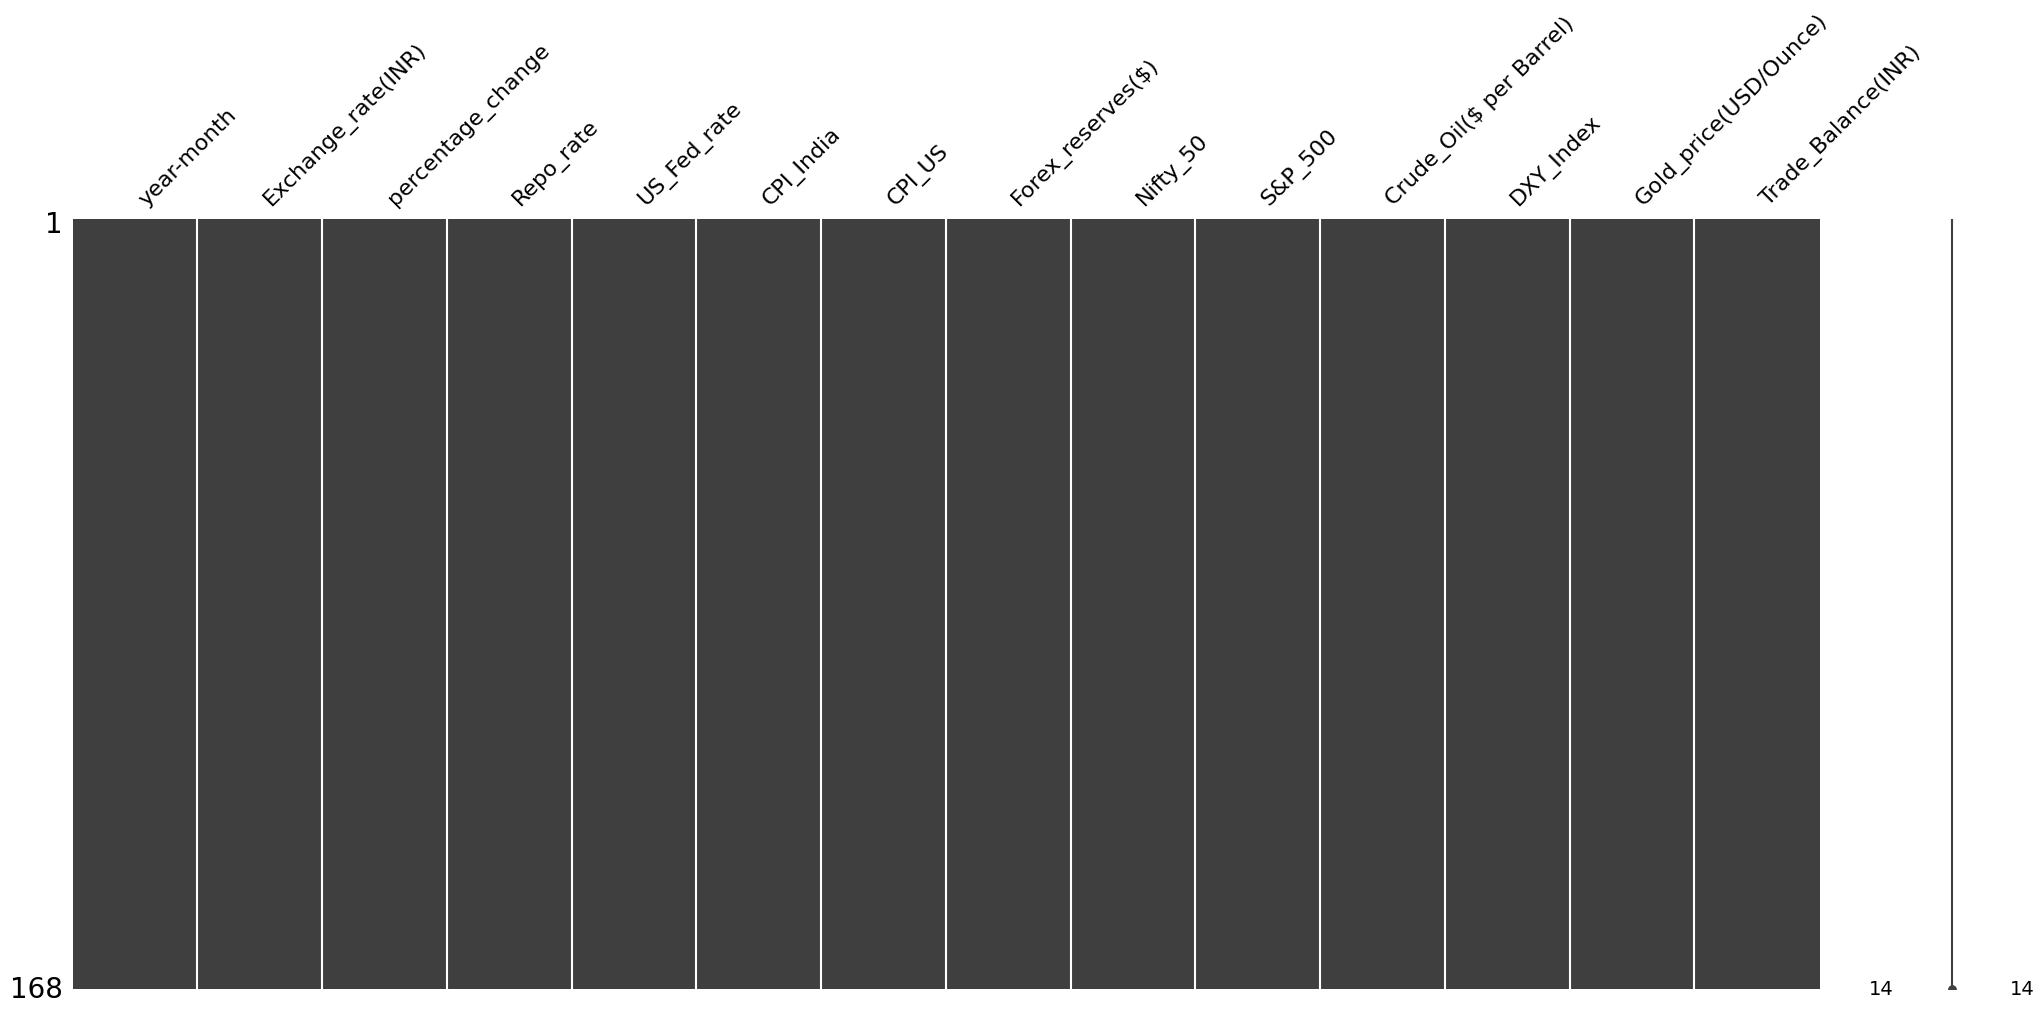

In [ ]:
msno.matrix(data)

In [ ]:
data.isnull().sum()

,0
year-month,0
Exchange_rate(INR),0
percentage_change,0
Repo_rate,0
US_Fed_rate,0
CPI_India,0
CPI_US,0
Forex_reserves($),0
Nifty_50,0
S&P_500,0


In [ ]:
data['year-month'] = pd.to_datetime(data['year-month'], format='%Y-%m')

In [ ]:
data.head(3)

,year-month,Exchange_rate(INR),percentage_change,Repo_rate,US_Fed_rate,CPI_India,CPI_US,Forex_reserves($),Nifty_50,S&P_500,Crude_Oil($ per Barrel),DXY_Index,Gold_price(USD/Ounce),Trade_Balance(INR)
0,2011-01-01,45.3934,0.005240,6.50,0.17,87.7,220.223,299224.0,5505.90,1286.12,96.52,77.73,1333.801,-48398.0
1,2011-02-01,45.4358,0.000934,6.50,0.16,87.2,221.309,301592.0,5333.25,1327.22,103.72,76.89,1409.301,-44209.0
2,2011-03-01,44.9914,-0.009781,6.75,0.14,87.4,223.467,304818.0,5833.75,1325.83,114.64,75.86,1438.901,-17315.0



### Trend Visualization


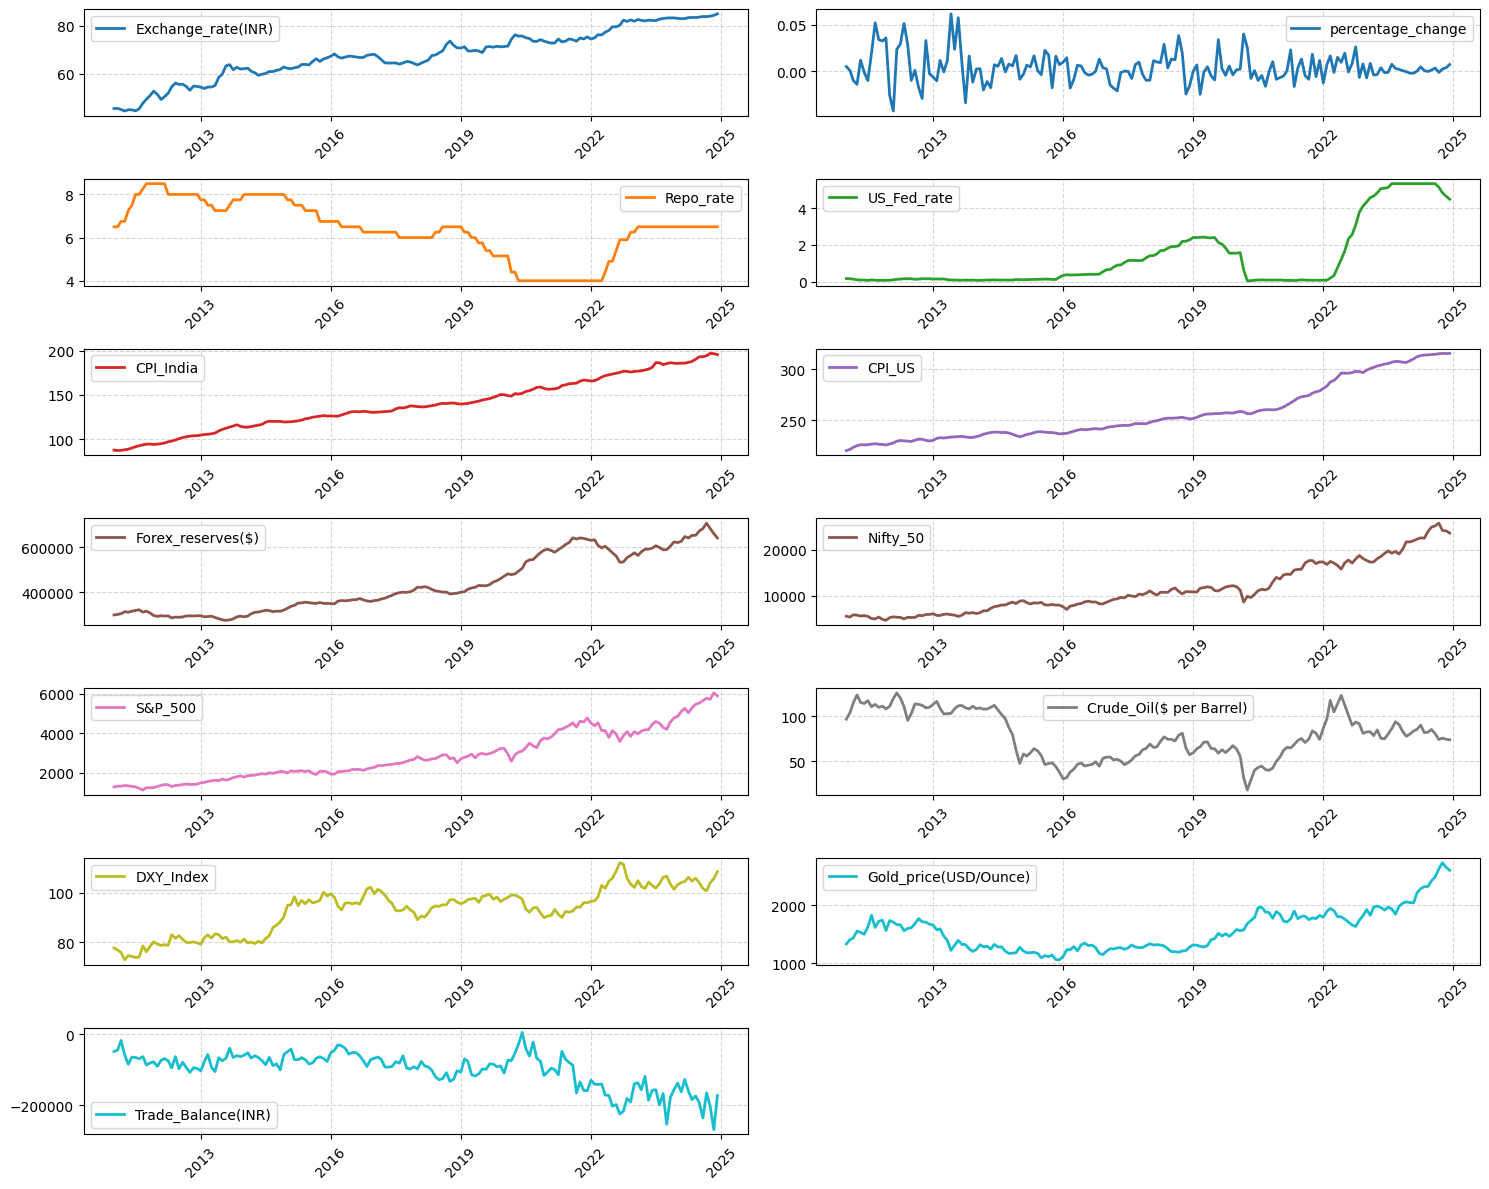

In [ ]:
import matplotlib.dates as mdates

# Exclude 'Date' column for plotting
columns_to_plot = [col for col in data.columns if col != 'year-month']
num_plots = len(columns_to_plot)

ncols = 2  # Fixed number of columns
nrows = -(-num_plots // ncols)

# Define colors
colors = plt.cm.tab10(np.linspace(0, 1, num_plots))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))
axes = axes.flatten()

for i, (column, color) in enumerate(zip(columns_to_plot, colors)):
    axes[i].plot(data['year-month'], data[column], label=column, color=color, linewidth=2)
    axes[i].xaxis.set_major_locator(mdates.YearLocator(base=3))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Detecting Outliers

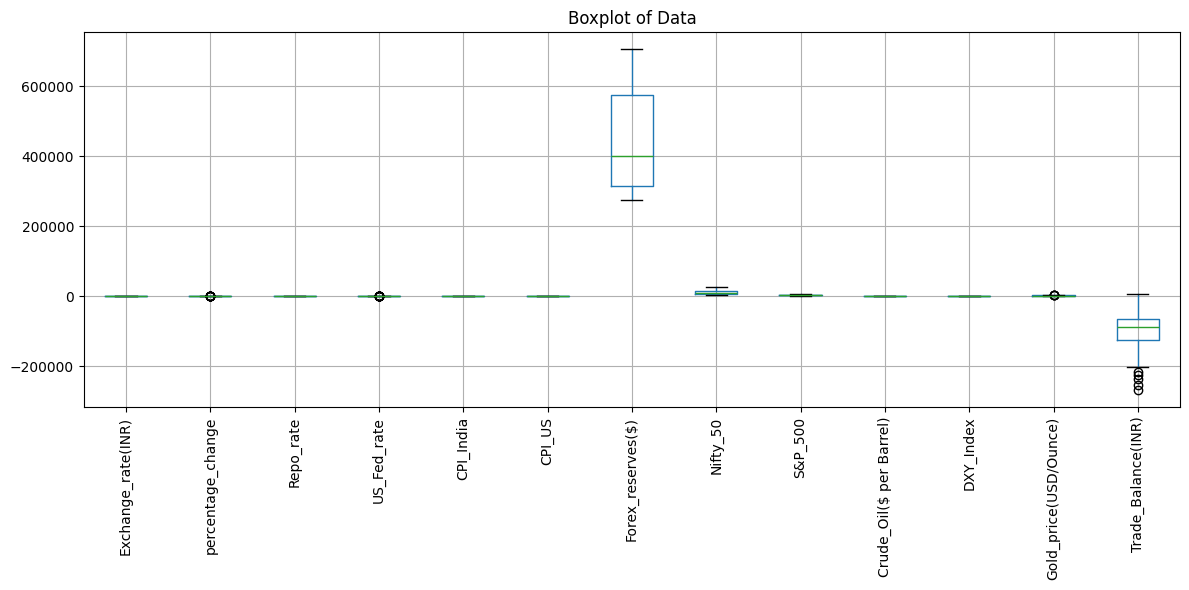

In [ ]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Data')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler as Std

In [ ]:
scale= Std()
data1=data.drop('year-month',axis=1)
data_scaled = pd.DataFrame(scale.fit_transform(data1),columns = data1.columns)

In [ ]:
data_scaled['year-month'] = data['year-month']

In [ ]:
data_scaled.head(2)

,Exchange_rate(INR),percentage_change,Repo_rate,US_Fed_rate,CPI_India,CPI_US,Forex_reserves($),Nifty_50,S&P_500,Crude_Oil($ per Barrel),DXY_Index,Gold_price(USD/Ounce),Trade_Balance(INR),year-month
0,-2.135116,0.084155,0.091505,-0.648888,-1.746892,-1.320555,-1.066438,-1.083595,-1.265637,0.725750,-1.649596,-0.657386,1.045078,2011-01-01
1,-2.131059,-0.185715,0.091505,-0.654608,-1.763918,-1.281251,-1.047892,-1.115356,-1.232404,1.008286,-1.740250,-0.444789,1.130818,2011-02-01


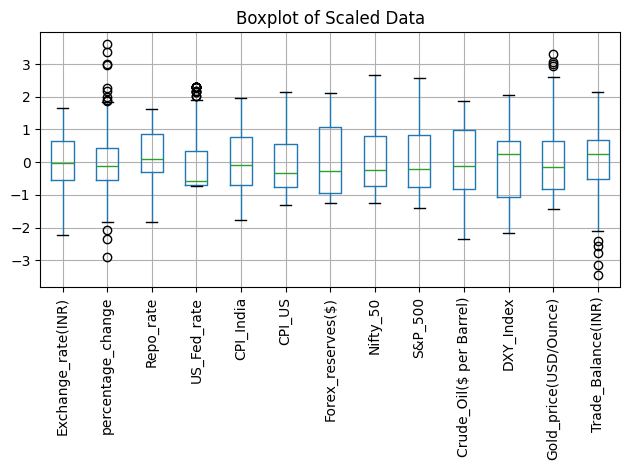

In [ ]:
data_scaled.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Scaled Data')
plt.tight_layout()
plt.show()

### Heatmap

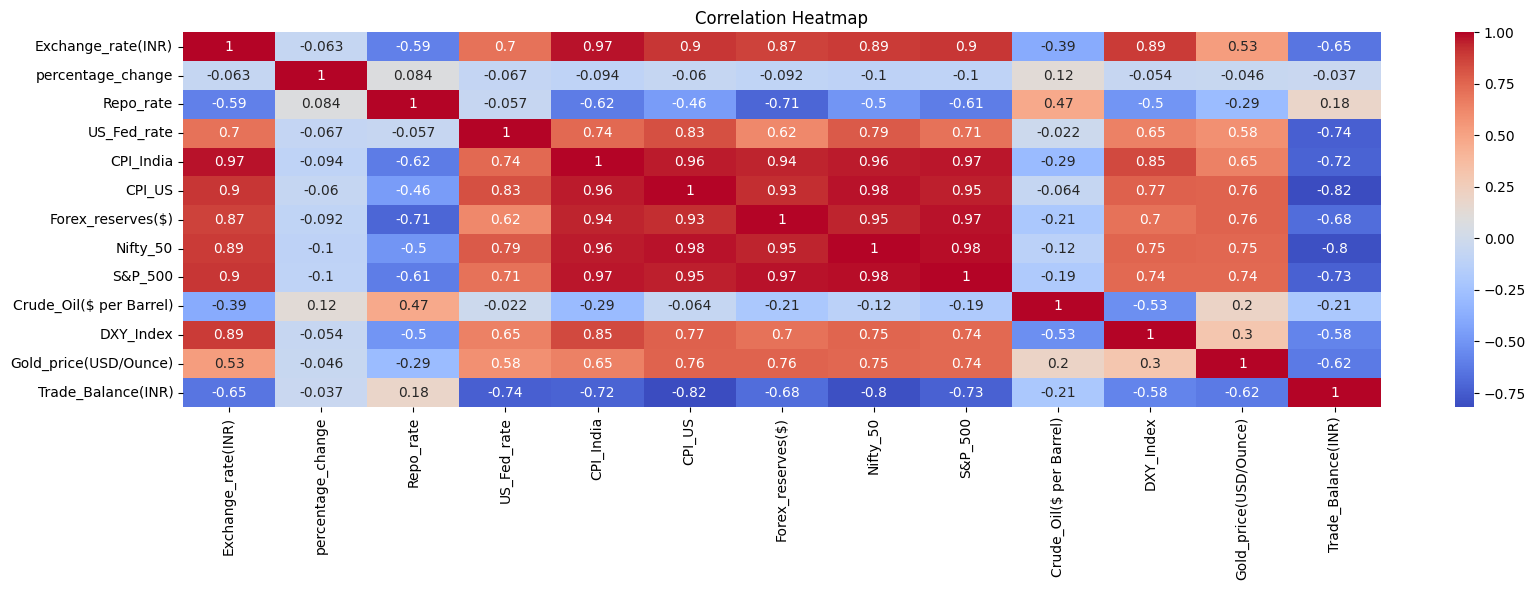

In [ ]:
plt.figure(figsize=(17, 6))
sns.heatmap(data_scaled.drop('year-month',axis=1).corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
data_scaled.drop('year-month',axis=1).corr()

,Exchange_rate(INR),percentage_change,Repo_rate,US_Fed_rate,CPI_India,CPI_US,Forex_reserves($),Nifty_50,S&P_500,Crude_Oil($ per Barrel),DXY_Index,Gold_price(USD/Ounce),Trade_Balance(INR)
Exchange_rate(INR),1.000000,-0.063362,-0.592762,0.702220,0.973519,0.903386,0.870431,0.887576,0.903418,-0.387223,0.887231,0.527930,-0.646031
percentage_change,-0.063362,1.000000,0.083694,-0.067038,-0.094263,-0.060356,-0.091561,-0.100752,-0.100293,0.123805,-0.054203,-0.045828,-0.037302
Repo_rate,-0.592762,0.083694,1.000000,-0.056836,-0.616243,-0.463375,-0.707624,-0.498786,-0.611065,0.468683,-0.502247,-0.291754,0.184251
US_Fed_rate,0.702220,-0.067038,-0.056836,1.000000,0.740592,0.826501,0.621374,0.792905,0.706090,-0.021976,0.647918,0.582404,-0.736989
CPI_India,0.973519,-0.094263,-0.616243,0.740592,1.000000,0.959588,0.943727,0.957562,0.966379,-0.294780,0.848342,0.645155,-0.722529
CPI_US,0.903386,-0.060356,-0.463375,0.826501,0.959588,1.000000,0.925683,0.977685,0.953667,-0.063950,0.768318,0.759646,-0.817927
Forex_reserves($),0.870431,-0.091561,-0.707624,0.621374,0.943727,0.925683,1.000000,0.945647,0.972915,-0.207103,0.703066,0.759905,-0.679282
Nifty_50,0.887576,-0.100752,-0.498786,0.792905,0.957562,0.977685,0.945647,1.000000,0.982065,-0.121495,0.754389,0.747724,-0.797838
S&P_500,0.903418,-0.100293,-0.611065,0.706090,0.966379,0.953667,0.972915,0.982065,1.000000,-0.185019,0.739369,0.742429,-0.731368
Crude_Oil($ per Barrel),-0.387223,0.123805,0.468683,-0.021976,-0.294780,-0.063950,-0.207103,-0.121495,-0.185019,1.000000,-0.533149,0.203210,-0.205672


### Stationarity

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(data):
    for col in data.columns:
       result = adfuller(data[col])
       print(f"p-value for {col}: {result[1]}")
       if result[1] < 0.05:
          print(f"Reject Null Hypothesis for {col}: Data is stationary")
       else:
          print(f"Accept Null Hypothesis for {col}: Data is non-stationary")
       print('\n')

In [ ]:
adf_test(data_scaled.drop('year-month',axis=1))

p-value for Exchange_rate(INR): 0.5816779895631801
Accept Null Hypothesis for Exchange_rate(INR): Data is non-stationary


p-value for percentage_change: 5.0742202770209245e-06
Reject Null Hypothesis for percentage_change: Data is stationary


p-value for Repo_rate: 0.46254035123754556
Accept Null Hypothesis for Repo_rate: Data is non-stationary


p-value for US_Fed_rate: 0.12139032202388089
Accept Null Hypothesis for US_Fed_rate: Data is non-stationary


p-value for CPI_India: 0.9914236889220505
Accept Null Hypothesis for CPI_India: Data is non-stationary


p-value for CPI_US: 0.969384918962658
Accept Null Hypothesis for CPI_US: Data is non-stationary


p-value for Forex_reserves($): 0.9409804085340132
Accept Null Hypothesis for Forex_reserves($): Data is non-stationary


p-value for Nifty_50: 0.9936246529876204
Accept Null Hypothesis for Nifty_50: Data is non-stationary


p-value for S&P_500: 0.9969149616598285
Accept Null Hypothesis for S&P_500: Data is non-stationary


p-value for 

In [ ]:
non_stationary_cols = ['Exchange_rate(INR)', 'Repo_rate','US_Fed_rate', 'CPI_India', 'CPI_US', 'Forex_reserves($)', 'Nifty_50',
       'S&P_500', 'Crude_Oil($ per Barrel)', 'DXY_Index','Gold_price(USD/Ounce)','Trade_Balance(INR)']

data_diff1 = data_scaled.copy()
data_diff1[non_stationary_cols] = data_diff1[non_stationary_cols].diff()

data_diff1 = data_diff1.rename(columns=lambda x: f"{x}_diff1" if x in non_stationary_cols else x)

In [ ]:
data_diff1.dropna(inplace=True)

In [ ]:
adf_test(data_diff1.drop('year-month',axis =1))

p-value for Exchange_rate(INR)_diff1: 6.286784482235794e-19
Reject Null Hypothesis for Exchange_rate(INR)_diff1: Data is stationary


p-value for percentage_change: 2.440001544698766e-06
Reject Null Hypothesis for percentage_change: Data is stationary


p-value for Repo_rate_diff1: 0.0002968273823382313
Reject Null Hypothesis for Repo_rate_diff1: Data is stationary


p-value for US_Fed_rate_diff1: 0.014822677423495342
Reject Null Hypothesis for US_Fed_rate_diff1: Data is stationary


p-value for CPI_India_diff1: 0.3798427648244248
Accept Null Hypothesis for CPI_India_diff1: Data is non-stationary


p-value for CPI_US_diff1: 0.361873455408575
Accept Null Hypothesis for CPI_US_diff1: Data is non-stationary


p-value for Forex_reserves($)_diff1: 4.137115733555662e-14
Reject Null Hypothesis for Forex_reserves($)_diff1: Data is stationary


p-value for Nifty_50_diff1: 2.191387397588236e-23
Reject Null Hypothesis for Nifty_50_diff1: Data is stationary


p-value for S&P_500_diff1: 1.101928468

In [ ]:
data_diff1.rename(columns={"CPI_US_diff1": "CPI_US", "CPI_India_diff1": "CPI_India",'Trade_Balance(INR)_diff1':'Trade_Balance(INR)'}, inplace=True)

In [ ]:
non_stationary_cols = ['CPI_India', 'CPI_US','Trade_Balance(INR)']

data_diff2 = data_diff1.copy()
data_diff2[non_stationary_cols] = data_diff2[non_stationary_cols].diff()

data_diff2 = data_diff2.rename(columns=lambda x: f"{x}_diff2" if x in non_stationary_cols else x)

In [ ]:
data_diff2.dropna(inplace=True)

In [ ]:
adf_test(data_diff2.drop('year-month',axis =1))

p-value for Exchange_rate(INR)_diff1: 6.603993183438958e-19
Reject Null Hypothesis for Exchange_rate(INR)_diff1: Data is stationary


p-value for percentage_change: 8.515956168753915e-07
Reject Null Hypothesis for percentage_change: Data is stationary


p-value for Repo_rate_diff1: 9.050091245329145e-05
Reject Null Hypothesis for Repo_rate_diff1: Data is stationary


p-value for US_Fed_rate_diff1: 0.01548999731904332
Reject Null Hypothesis for US_Fed_rate_diff1: Data is stationary


p-value for CPI_India_diff2: 7.293954004350278e-13
Reject Null Hypothesis for CPI_India_diff2: Data is stationary


p-value for CPI_US_diff2: 2.1927283667287613e-12
Reject Null Hypothesis for CPI_US_diff2: Data is stationary


p-value for Forex_reserves($)_diff1: 4.81696298367683e-14
Reject Null Hypothesis for Forex_reserves($)_diff1: Data is stationary


p-value for Nifty_50_diff1: 2.9175254578719215e-23
Reject Null Hypothesis for Nifty_50_diff1: Data is stationary


p-value for S&P_500_diff1: 1.2772565828

In [ ]:
data_diff2.set_index('year-month', inplace=True)

# Model Prediction

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.api import VAR

In [ ]:
train_size = int(len(data_diff2) * 0.8)
train_data, test_data = data_diff2.iloc[:train_size], data_diff2.iloc[train_size:]

#  Gold Price Forecasting using ARIMA and VAR model

In [ ]:
target = data_diff2['Gold_price(USD/Ounce)_diff1']

max_lag = 20

acf_vals = acf(target, nlags=max_lag)
pacf_vals = pacf(target, nlags=max_lag)

lags = np.arange(max_lag + 1)
acf_pacf_df = pd.DataFrame({'Lag': lags, 'ACF': acf_vals, 'PACF': pacf_vals})

print(acf_pacf_df)

    Lag       ACF      PACF
0     0  1.000000  1.000000
1     1 -0.066156 -0.066557
2     2 -0.037482 -0.042558
3     3  0.058381  0.054329
4     4 -0.019021 -0.013481
5     5  0.080239  0.085705
6     6 -0.003574  0.002910
7     7  0.018194  0.027856
8     8 -0.123528 -0.139159
9     9 -0.032004 -0.048199
10   10  0.050492  0.027994
11   11  0.121440  0.156399
12   12  0.042959  0.072128
13   13  0.014041  0.054636
14   14 -0.030305 -0.042436
15   15 -0.025937 -0.046189
16   16  0.048908 -0.003018
17   17  0.005861 -0.005053
18   18  0.061371  0.087043
19   19  0.043070  0.117159
20   20  0.023896  0.085537


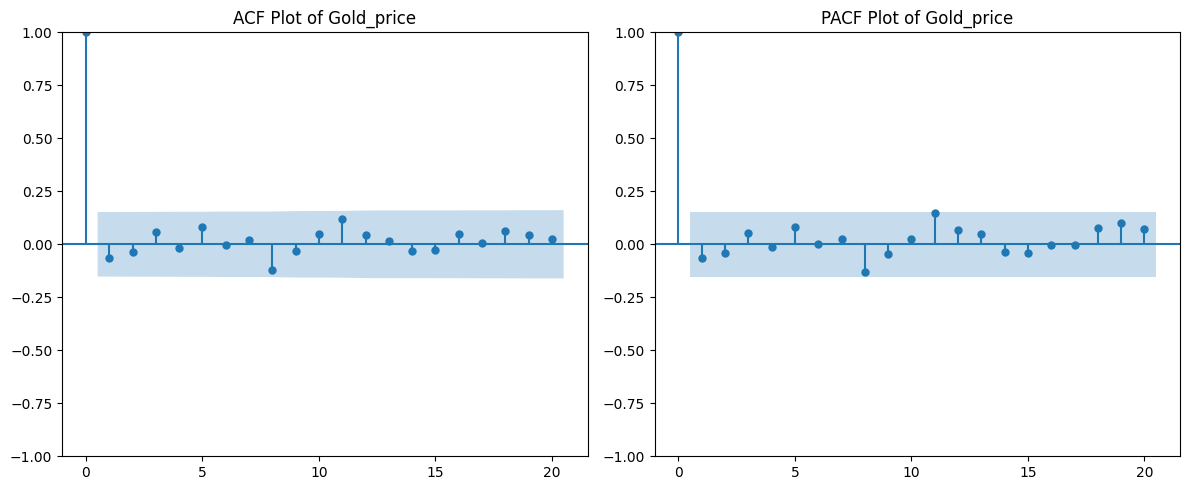

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(data_diff2['Gold_price(USD/Ounce)_diff1'], lags=20, ax=axes[0])
axes[0].set_title('ACF Plot of Gold_price')

plot_pacf(data_diff2['Gold_price(USD/Ounce)_diff1'], lags=20, ax=axes[1])
axes[1].set_title('PACF Plot of Gold_price')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


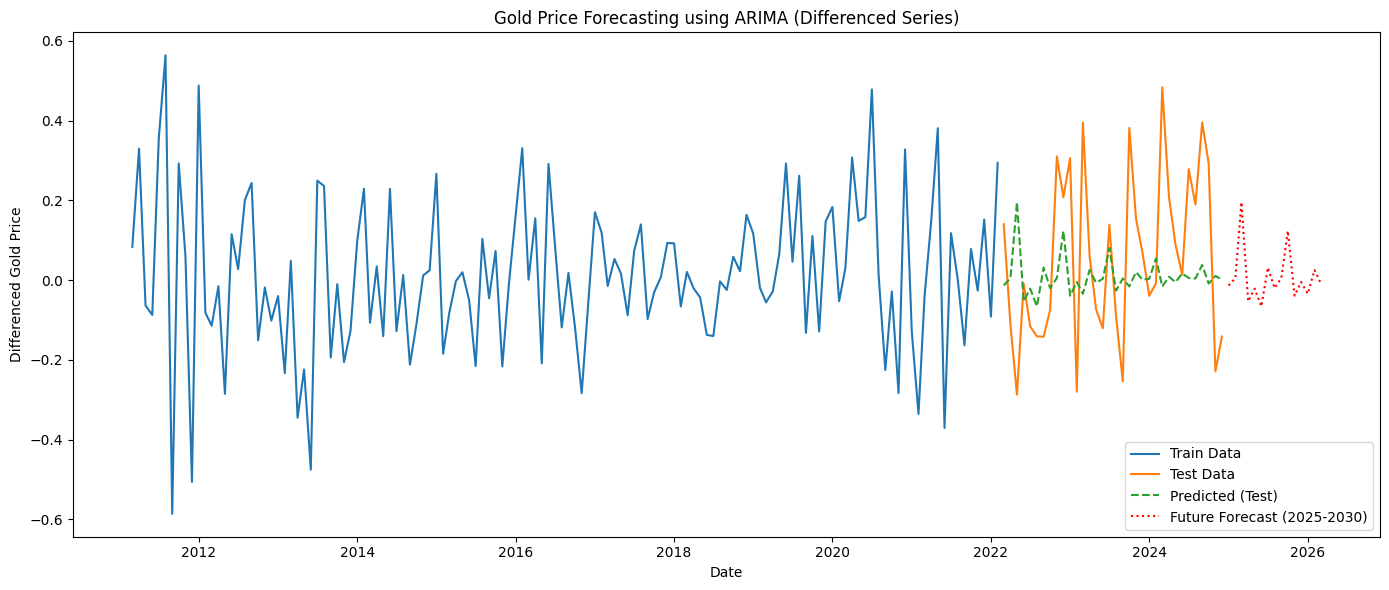

In [ ]:
model = ARIMA(train_data['Gold_price(USD/Ounce)_diff1'], order=(8, 0, 8))
fitted_model = model.fit()

# Forecast on test_data
test_forecast = fitted_model.forecast(steps=len(test_data))

# Forecast into the future
future_steps = 15
future_forecast = fitted_model.forecast(steps=future_steps)

# Create datetime index for future forecasts
last_date = test_data.index[-1]
future_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='MS')

# Plotting
plt.figure(figsize=(14,6))
plt.plot(train_data.index, train_data['Gold_price(USD/Ounce)_diff1'], label='Train Data')
plt.plot(test_data.index, test_data['Gold_price(USD/Ounce)_diff1'], label='Test Data')
plt.plot(test_data.index, test_forecast, label='Predicted (Test)', linestyle='dashed')
plt.plot(future_index, future_forecast, label='Future Forecast (2025-2030)', linestyle='dotted', color='red')
plt.legend()
plt.title("Gold Price Forecasting using ARIMA (Differenced Series)")
plt.xlabel("Date")
plt.ylabel("Differenced Gold Price")
plt.tight_layout()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Gold_price(USD/Ounce)_diff1'], test_forecast))
mape = mean_absolute_percentage_error(test_data['Gold_price(USD/Ounce)_diff1'], test_forecast)
aic = fitted_model.aic
n = fitted_model.nobs
k = fitted_model.df_model

# AICc formula
aicc = aic + (2 * k * (k + 1)) / (n - k - 1)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"AIC: {fitted_model.aic}")
print(f"BIC: {fitted_model.bic}")
print(f"AICc: {aicc}")

RMSE: 0.22900055848713705
MAPE: 125.43%
AIC: -40.710420587988494
BIC: 11.180014018566169
AICc: -34.65732324285575


In [ ]:
# to get optimal lags
model = VAR(train_data)

lag_selection = model.select_order(maxlags=8)

print(lag_selection.summary())

print("Best lag (AIC):", lag_selection.aic)
print("Best lag (BIC):", lag_selection.bic)
print("Best lag (HQIC):", lag_selection.hqic)


 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -61.56     -61.27*   1.838e-27      -61.44
1      -62.22      -58.08   9.642e-28      -60.54
2      -62.25      -54.27   1.009e-27      -59.01
3      -61.92      -50.10   1.744e-27      -57.12
4      -61.89      -46.22   2.841e-27      -55.52
5      -61.98      -42.46   5.937e-27      -54.05
6      -62.97      -39.62   9.180e-27      -53.48
7      -66.66      -39.45   2.851e-27      -55.61
8     -74.48*      -43.43  1.403e-28*     -61.87*
-------------------------------------------------
Best lag (AIC): 8
Best lag (BIC): 0
Best lag (HQIC): 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


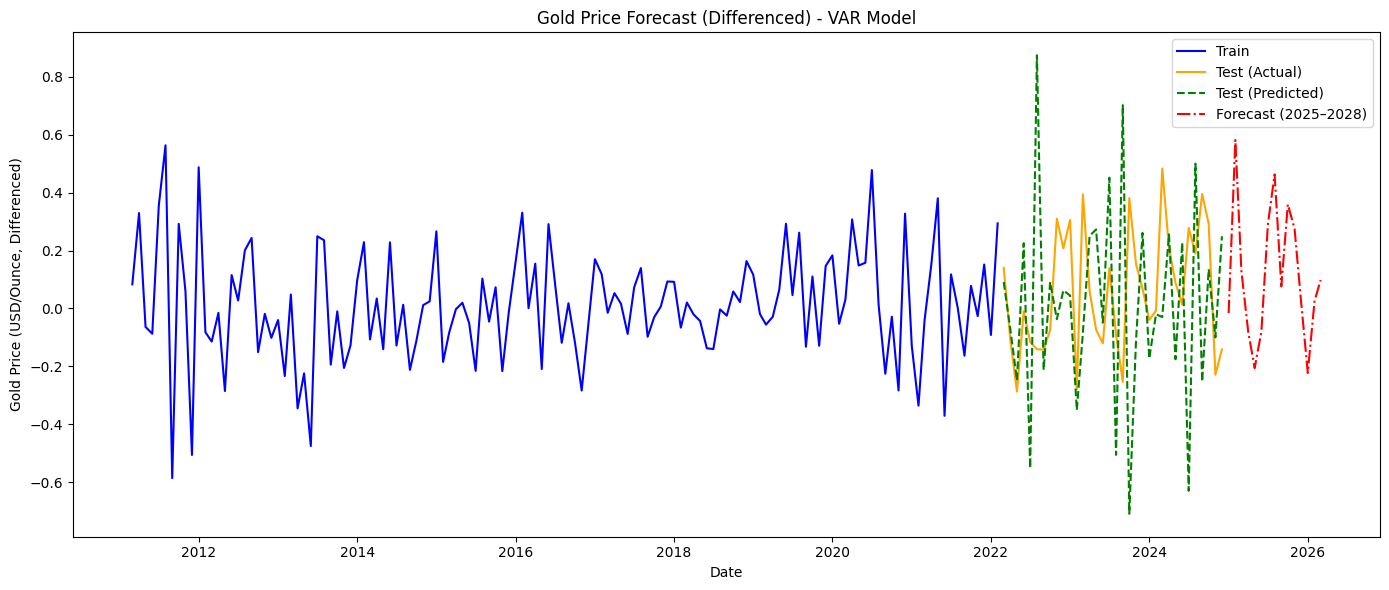

In [ ]:
model = VAR(train_data)
lag_order = model.select_order(maxlags=8)
selected_lag = lag_order.aic
fitted_model = model.fit(selected_lag)

# Forecast on test_data
n_test = len(test_data)
test_forecast = fitted_model.forecast(train_data.values[-selected_lag:], steps=n_test)
test_forecast_df = pd.DataFrame(test_forecast, index=test_data.index, columns=train_data.columns)

# Refitting model on full data for future forecasting
full_data = pd.concat([train_data, test_data])
model_full = VAR(full_data)
fitted_full_model = model_full.fit(selected_lag)

# Forecast future values (2025–2028)
future_steps = 15
last_input = full_data.values[-selected_lag:]
future_forecast = fitted_full_model.forecast(last_input, steps=future_steps)

# Create datetime index for future forecast
last_date = full_data.index[-1]
future_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='MS')
future_df = pd.DataFrame(future_forecast, index=future_index, columns=train_data.columns)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(train_data['Gold_price(USD/Ounce)_diff1'], label='Train', color='blue')
plt.plot(test_data['Gold_price(USD/Ounce)_diff1'], label='Test (Actual)', color='orange')
plt.plot(test_forecast_df['Gold_price(USD/Ounce)_diff1'], label='Test (Predicted)', color='green', linestyle='--')
plt.plot(future_df['Gold_price(USD/Ounce)_diff1'], label='Forecast (2025–2028)', color='red', linestyle='dashdot')
plt.title('Gold Price Forecast (Differenced) - VAR Model')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD/Ounce, Differenced)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Gold_price(USD/Ounce)_diff1'], test_forecast_df['Gold_price(USD/Ounce)_diff1']))
mape = mean_absolute_percentage_error(test_data['Gold_price(USD/Ounce)_diff1'], test_forecast_df['Gold_price(USD/Ounce)_diff1']) * 100

# AICc calculation (corrected AIC)
aic = fitted_model.aic
k = fitted_model.neqs
k = fitted_model.df_model
aicc = aic + (2 * k * (k + 1)) / (n - k - 1)

# Print results
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"AIC  : {fitted_model.aic}")
print(f"BIC  : {fitted_model.bic}")
print(f"AICc : {aicc}")

RMSE: 0.43170811925033814
MAPE: 314.06%
AIC  : -74.47821197311349
BIC  : -43.432370545283845
AICc : 1162.1884546935532


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

def granger_causality_matrix(data, target_col, variables, max_lag=8):
    results = {}
    for var in variables:
        if var == target_col:
            continue
        p_values = []
        for lag in range(1, max_lag + 1):
            test_result = grangercausalitytests(data[[target_col, var]], maxlag=lag, verbose=False)
            p_val = test_result[lag][0]['ssr_ftest'][1]
            p_values.append(round(p_val, 4))
        results[var] = p_values
    df_results = pd.DataFrame(results, index=[f'Lag {i}' for i in range(1, max_lag + 1)])
    return df_results.T

target = 'Gold_price(USD/Ounce)'
variables = train_data.columns
granger_table = granger_causality_matrix(scaled_data, target_col=target, variables=variables, max_lag=8)

# Displaying the table
print("Granger Causality p-values (testing if column causes Gold Price):")
print(granger_table)


Granger Causality p-values (testing if column causes Gold Price):
                                Lag 1   Lag 2   Lag 3   Lag 4   Lag 5   Lag 6  \
Exchange_rate(INR)_diff1       0.4793  0.3985  0.4758  0.4803  0.5447  0.4429   
percentage_change              0.6402  0.4296  0.5088  0.5464  0.6250  0.4790   
Repo_rate_diff1                0.0041  0.0013  0.0032  0.0012  0.0009  0.0023   
US_Fed_rate_diff1              0.2394  0.3478  0.1369  0.0778  0.1086  0.0889   
CPI_India_diff2                0.7741  0.9412  0.5895  0.7389  0.8057  0.7026   
CPI_US_diff2                   0.3762  0.5435  0.6853  0.3099  0.2882  0.7250   
Forex_reserves($)_diff1        0.8523  0.5053  0.6345  0.6217  0.7936  0.5296   
Nifty_50_diff1                 0.4862  0.2021  0.3383  0.2292  0.3054  0.4027   
S&P_500_diff1                  0.6378  0.6672  0.5804  0.7153  0.5697  0.7222   
Crude_Oil($ per Barrel)_diff1  0.3934  0.2396  0.1433  0.2677  0.2390  0.3869   
DXY_Index_diff1                0.2139  0.29

# Final Interpreation of future gold Price

According to AICc, we can see the VAR model has less value than the Arima Model. Hence We choose VAR model as the best model in this case.

# Exchange Rate Forecasting using ARIMA and VAR model

In [ ]:
target = data_diff2['Exchange_rate(INR)_diff1']

max_lag = 20

acf_vals = acf(target, nlags=max_lag)
pacf_vals = pacf(target, nlags=max_lag)

lags = np.arange(max_lag + 1)
acf_pacf_df = pd.DataFrame({'Lag': lags, 'ACF': acf_vals, 'PACF': pacf_vals})

print(acf_pacf_df)

    Lag       ACF      PACF
0     0  1.000000  1.000000
1     1  0.185743  0.186868
2     2 -0.017349 -0.054379
3     3 -0.000726  0.013388
4     4 -0.138381 -0.150880
5     5 -0.027534  0.030680
6     6 -0.063334 -0.082890
7     7  0.075644  0.121626
8     8 -0.008141 -0.084714
9     9 -0.187792 -0.177888
10   10 -0.158788 -0.140292
11   11 -0.048477  0.023880
12   12  0.054084  0.053127
13   13 -0.064529 -0.141109
14   14  0.018420  0.002500
15   15  0.117945  0.091958
16   16 -0.092701 -0.122034
17   17 -0.144055 -0.156961
18   18  0.050773  0.091360
19   19 -0.013493 -0.108182
20   20  0.121381  0.158380


Text(0.5, 1.0, 'PACF Plot of Exchange Rate')

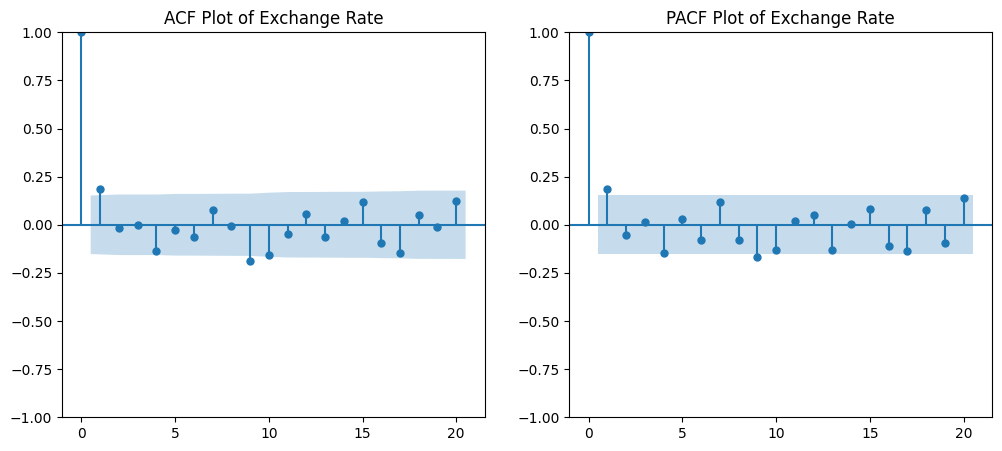

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(data_diff2['Exchange_rate(INR)_diff1'], lags=20, ax=axes[0])
axes[0].set_title('ACF Plot of Exchange Rate')

plot_pacf(data_diff2['Exchange_rate(INR)_diff1'], lags=20, ax=axes[1])
axes[1].set_title('PACF Plot of Exchange Rate')


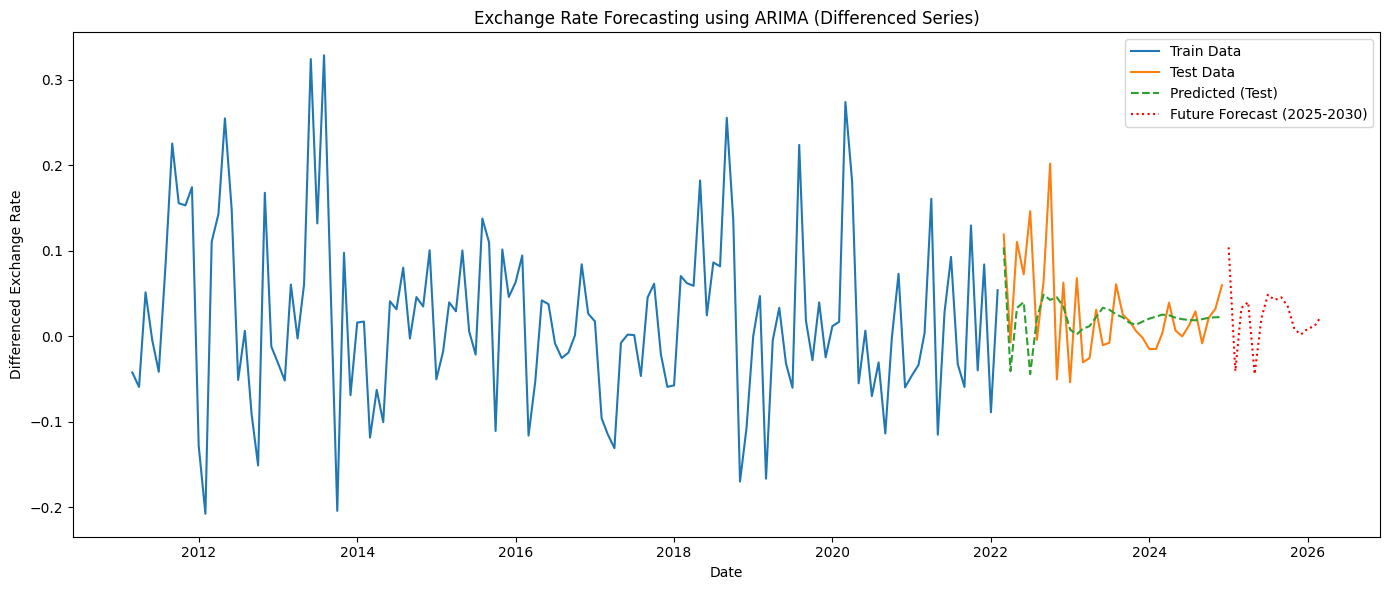

In [ ]:
model = ARIMA(train_data['Exchange_rate(INR)_diff1'], order=(4, 0, 9))
fitted_model = model.fit()

# Forecast on test period
test_forecast = fitted_model.forecast(steps=len(test_data))

# Forecast into the future
future_steps = 15
future_forecast = fitted_model.forecast(steps=future_steps)

# Create datetime index for future forecasts
last_date = test_data.index[-1]
future_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='MS')

# Plotting
plt.figure(figsize=(14,6))
plt.plot(train_data.index, train_data['Exchange_rate(INR)_diff1'], label='Train Data')
plt.plot(test_data.index, test_data['Exchange_rate(INR)_diff1'], label='Test Data')
plt.plot(test_data.index, test_forecast, label='Predicted (Test)', linestyle='dashed')
plt.plot(future_index, future_forecast, label='Future Forecast (2025-2030)', linestyle='dotted', color='red')
plt.legend()
plt.title("Exchange Rate Forecasting using ARIMA (Differenced Series)")
plt.xlabel("Date")
plt.ylabel("Differenced Exchange Rate")
plt.tight_layout()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Exchange_rate(INR)_diff1'], test_forecast))
mape = mean_absolute_percentage_error(test_data['Exchange_rate(INR)_diff1'], test_forecast)
aic = fitted_model.aic
n = fitted_model.nobs
k = fitted_model.df_model

# AICc formula
aicc = aic + (2 * k * (k + 1)) / (n - k - 1)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"AIC: {fitted_model.aic}")
print(f"BIC: {fitted_model.bic}")
print(f"AICc: {aicc}")

RMSE: 0.055218911584419966
MAPE: 382.17%
AIC: -224.19878423069198
BIC: -180.95675539189642
AICc: -220.06085319620922


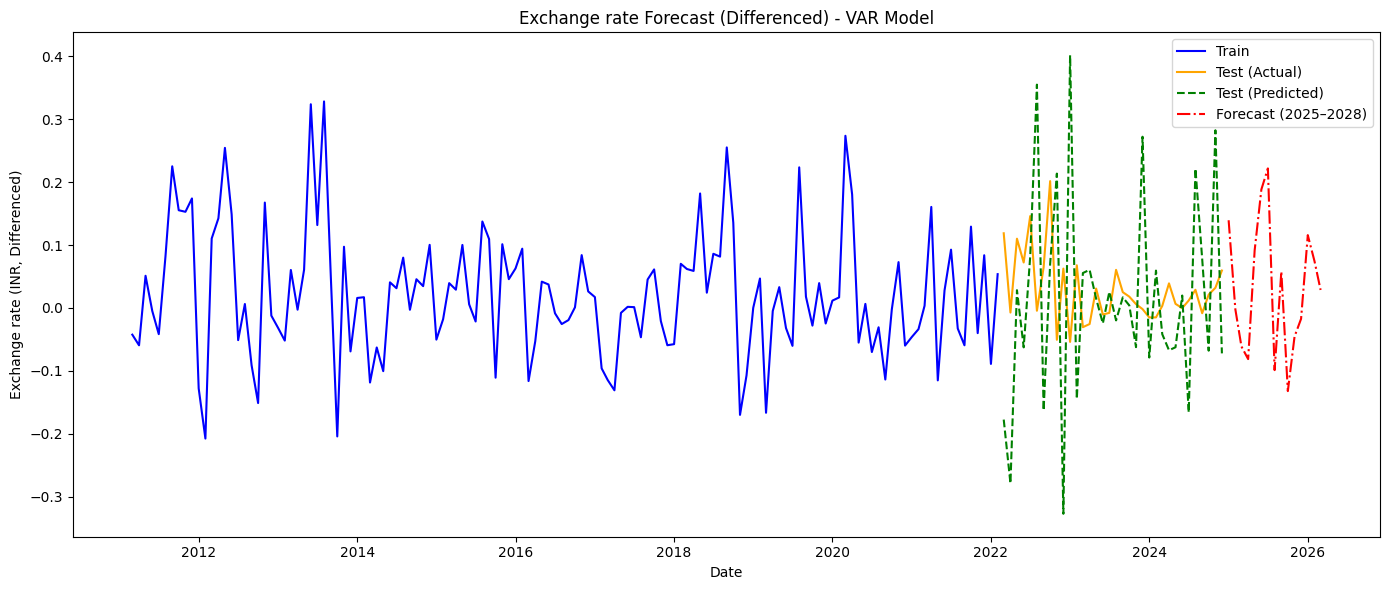

In [ ]:
model = VAR(train_data)
lag_order = model.select_order(maxlags=8)
selected_lag = lag_order.aic
fitted_model = model.fit(selected_lag)

# Forecast on test_data
n_test = len(test_data)
test_forecast = fitted_model.forecast(train_data.values[-selected_lag:], steps=n_test)
test_forecast_df = pd.DataFrame(test_forecast, index=test_data.index, columns=train_data.columns)

# Refit model on full data for future forecasting
full_data = pd.concat([train_data, test_data])
model_full = VAR(full_data)
fitted_full_model = model_full.fit(selected_lag)

# Forecast future values
future_steps = 15
last_input = full_data.values[-selected_lag:]
future_forecast = fitted_full_model.forecast(last_input, steps=future_steps)

# Create datetime index for future forecast
last_date = full_data.index[-1]
future_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='MS')
future_df = pd.DataFrame(future_forecast, index=future_index, columns=train_data.columns)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(train_data['Exchange_rate(INR)_diff1'], label='Train', color='blue')
plt.plot(test_data['Exchange_rate(INR)_diff1'], label='Test (Actual)', color='orange')
plt.plot(test_forecast_df['Exchange_rate(INR)_diff1'], label='Test (Predicted)', color='green', linestyle='--')
plt.plot(future_df['Exchange_rate(INR)_diff1'], label='Forecast (2025–2028)', color='red', linestyle='dashdot')
plt.title('Exchange rate Forecast (Differenced) - VAR Model')
plt.xlabel('Date')
plt.ylabel('Exchange rate (INR, Differenced)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Exchange_rate(INR)_diff1'], test_forecast_df['Exchange_rate(INR)_diff1']))
mape = mean_absolute_percentage_error(test_data['Exchange_rate(INR)_diff1'], test_forecast_df['Exchange_rate(INR)_diff1'])

# AICc calculation (corrected AIC)
n = fitted_model.nobs
k = fitted_model.df_model
aic = fitted_model.aic
aicc = aic + (2 * k * (k + 1)) / (n - k - 1)

# Print results
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"AIC  : {fitted_model.aic}")
print(f"BIC  : {fitted_model.bic}")
print(f"AICc : {aicc}")

RMSE: 0.1847356386615379
MAPE: 13.98%
AIC  : -74.47821197311349
BIC  : -43.432370545283845
AICc : 1162.1884546935532


In [ ]:
def granger_causality_matrix(data, target_col, variables, max_lag=8):
    results = {}
    for var in variables:
        if var == target_col:
            continue
        p_values = []
        for lag in range(1, max_lag + 1):
            test_result = grangercausalitytests(data[[target_col, var]], maxlag=lag, verbose=False)
            p_val = test_result[lag][0]['ssr_ftest'][1]
            p_values.append(round(p_val, 4))
        results[var] = p_values
    df_results = pd.DataFrame(results, index=[f'Lag {i}' for i in range(1, max_lag + 1)])
    return df_results.T

target = 'Exchange_rate(INR)_diff1'
variables = train_data.columns
granger_table = granger_causality_matrix(train_data, target_col=target, variables=variables, max_lag=8)

# Displaying the table
print("Granger Causality p-values (testing if column causes Exchange rate):")
print(granger_table)


Granger Causality p-values (testing if column causes Gold Price):
                                Lag 1   Lag 2   Lag 3   Lag 4   Lag 5   Lag 6  \
percentage_change              0.0331  0.0939  0.1720  0.0428  0.0408  0.0451   
Repo_rate_diff1                0.3857  0.6316  0.8227  0.8828  0.9306  0.9548   
US_Fed_rate_diff1              0.7679  0.8160  0.9361  0.9826  0.9870  0.9684   
CPI_India_diff2                0.2882  0.4931  0.6974  0.7999  0.8015  0.9227   
CPI_US_diff2                   0.6100  0.6811  0.8507  0.9528  0.9819  0.9640   
Forex_reserves($)_diff1        0.0175  0.0159  0.0218  0.0292  0.0503  0.0361   
Nifty_50_diff1                 0.0026  0.0038  0.0033  0.0126  0.0279  0.0514   
S&P_500_diff1                  0.0065  0.0264  0.0200  0.0243  0.0429  0.0696   
Crude_Oil($ per Barrel)_diff1  0.7575  0.6074  0.7090  0.7683  0.7439  0.5932   
DXY_Index_diff1                0.0096  0.0271  0.0262  0.0680  0.0419  0.0086   
Gold_price(USD/Ounce)_diff1    0.1017  0.14

# Final Interpreation of future Exchange Rate

According to AICc, we can see the ARIMA model has less Value than the VAR Model. Hence We choose ARIMA model as the best model in this case.